In [18]:
#clear all
%reset -f

#import packages
import numpy as np
import sys
import os
import pandas as pd
import mne
import matplotlib
from sklearn.utils import resample
from mne_icalabel import label_components

root = 'F:/Documents/Science/MirRevAdaptEEG'
participants = list(range(0,3))
#specify which erp we are analyzing
erps = 'lrp'

#pop up plots as separate window & interactive
%matplotlib qt
matplotlib.pyplot.close('all')

In [19]:
#setting up path/ directory
#access specific file for specific participant
def load_epochs(pp_num, root_dir, erp_path):

    root_directory = root_dir
    data_directory = os.path.join(root_directory, 'data/eeg/')
    id_directory = os.path.join(data_directory, 'p%03d/' % pp_num)
    pp_directory = os.path.join(id_directory, erp_path)
    filename = os.path.join(pp_directory, 'mra_p%03d_run0-epo.fif' % pp_num)

    epochs = mne.read_epochs(filename)
    #baseline for each trial
    #if erp_path == 'frn':
     #   epochs = epochs.apply_baseline(baseline = (-1.5, -1.2))
    #elif erp_path == 'lrp':
     #   epochs = epochs.apply_baseline(baseline = (-1.3, -1.0))
    #elif erp_path == 'ern':
     #   epochs = epochs.apply_baseline(baseline = (-1.35, -1.05))

    return epochs, pp_directory

In [7]:
#1: Divide by conditions
#2: Look into individual data, then a way to average the plots across three people?
#3: only for ROIs?

array([ 6.        ,  7.71912254,  9.93080879, 12.77618833, 16.43682721,
       21.1463139 , 27.2051647 , 35.        ])

Reading F:\Documents\Science\MirRevAdaptEEG\data\eeg\p000\lrp\mra_p000_run0-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1490.00 ms
        0 CTF compensation matrices available
Not setting metadata
420 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


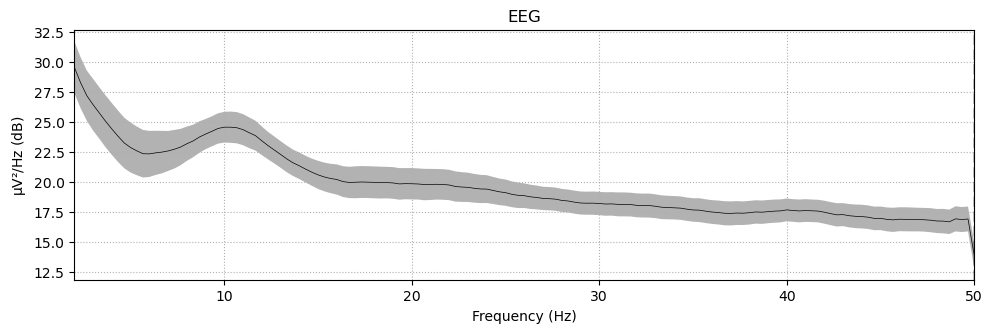

In [28]:
pp = 0
data, ppdir = load_epochs(pp, root_dir = root, erp_path = erps)
data.compute_psd(fmin=2.0, fmax=50).plot(average=True, picks="data", exclude="bads")

In [24]:
pp = 0
data, ppdir = load_epochs(pp, root_dir = root, erp_path = erps)
#data.compute_psd(fmin=2.0, fmax=40.0).plot(average=True, picks="data", exclude="bads")
#data.compute_psd().plot_topomap(ch_type="eeg", normalize=False, contours=0)

freqs = np.logspace(*np.log10([6, 35]), num=50) #num here is how many frequencies you will have
n_cycles = 6 #freqs / 2.0  # different number of cycle per frequency #this is for morlet wavelet
power, itc = mne.time_frequency.tfr_morlet(
    data,
    freqs=freqs,
    n_cycles=n_cycles,
    use_fft=True,
    return_itc=True,
    decim=1,
    n_jobs=None,
)

Reading F:\Documents\Science\MirRevAdaptEEG\data\eeg\p000\lrp\mra_p000_run0-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1490.00 ms
        0 CTF compensation matrices available
Not setting metadata
420 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   39.0s finished


Applying baseline correction (mode: logratio)


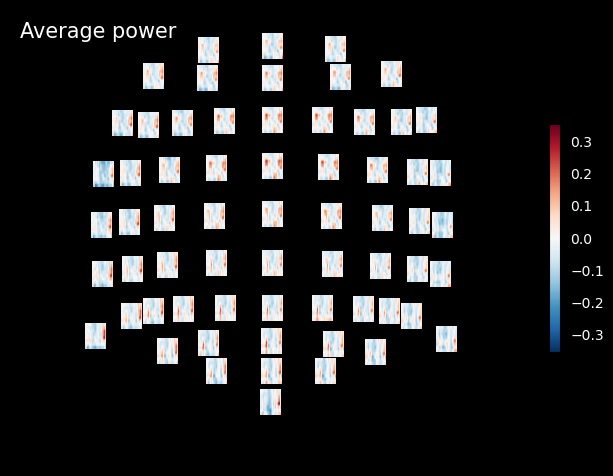

C:\Users\Raphael\anaconda3\envs\mne\lib\site-packages\matplotlib\cbook\__init__.py:307: RuntimeWarning: `mask` is None, not masking the plot ...
  func(*args, **kwargs)
C:\Users\Raphael\anaconda3\envs\mne\lib\site-packages\matplotlib\cbook\__init__.py:307: RuntimeWarning: `mask` is None, not adding contour to the plot ...
  func(*args, **kwargs)
C:\Users\Raphael\anaconda3\envs\mne\lib\site-packages\matplotlib\cbook\__init__.py:307: RuntimeWarning: `mask` is None, not masking the plot ...
  func(*args, **kwargs)
C:\Users\Raphael\anaconda3\envs\mne\lib\site-packages\matplotlib\cbook\__init__.py:307: RuntimeWarning: `mask` is None, not adding contour to the plot ...
  func(*args, **kwargs)
C:\Users\Raphael\anaconda3\envs\mne\lib\site-packages\matplotlib\cbook\__init__.py:307: RuntimeWarning: `mask` is None, not masking the plot ...
  func(*args, **kwargs)
C:\Users\Raphael\anaconda3\envs\mne\lib\site-packages\matplotlib\cbook\__init__.py:307: RuntimeWarning: `mask` is None, not adding cont

In [21]:
power.plot_topo(baseline=(-1.5, -1.2), mode="logratio", title="Average power")

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


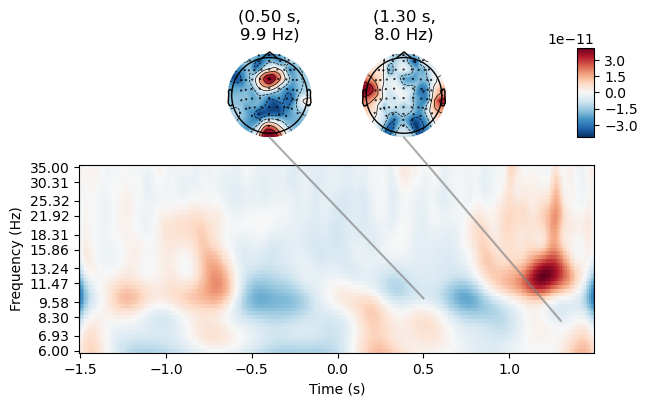

In [25]:
power.plot_joint(
    baseline=(-1.5, -1.2), mode="mean", tmin=-1.5, tmax=1.5, timefreqs=[(0.5, 10), (1.3, 8)]
)

No baseline correction applied


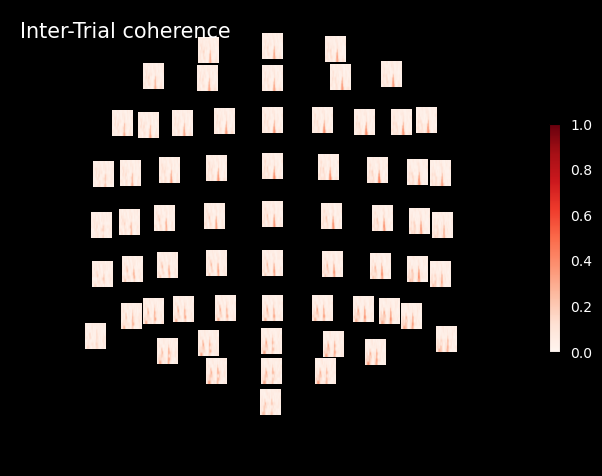

C:\Users\Raphael\anaconda3\envs\mne\lib\site-packages\matplotlib\cbook\__init__.py:307: RuntimeWarning: `mask` is None, not masking the plot ...
  func(*args, **kwargs)
C:\Users\Raphael\anaconda3\envs\mne\lib\site-packages\matplotlib\cbook\__init__.py:307: RuntimeWarning: `mask` is None, not adding contour to the plot ...
  func(*args, **kwargs)


In [23]:
itc.plot_topo(title="Inter-Trial coherence", vmin=0.0, vmax=1.0, cmap="Reds")

In [ ]:
# def rotate_trials(task, pp, epochs):

#     if pp % 2 == 0:
#         if task == 'rot':
#             #get trial after first two tasks (trial 96 to 185)
#             epochs = epochs[96:186]
#         elif task == 'rdm':
#             #get trial after first task (trial 48 to 95)
#             epochs = epochs[48:96]
#     elif pp % 2 == 1:
#         if task == 'rot':
#             #get trial after first five tasks (trial 282 to 371)
#             epochs = epochs[282:372]
#         elif task == 'rdm':
#             #get trial after first five tasks (trial 234 to 281)
#             epochs = epochs[234:282]
    
#     return(epochs)

In [ ]:
#get index of trials from behavioral data
#rdm before rot and rdm before mir are read in as two different behavioral data
def epoch_index(task, listval, pp, target = np.nan):
    if task == 'rot':
        df = pd.read_csv(r'F:\Documents\Science\MirRevAdaptEEG\data\ROT_learningcurve_degrees.csv')
    elif task == 'rdmrot':
        df = pd.read_csv(r'F:\Documents\Science\MirRevAdaptEEG\data\RDMROT_learningcurve_degrees_%02d.csv' % target)
    elif task == 'rdmmir':
        df = pd.read_csv(r'F:\Documents\Science\MirRevAdaptEEG\data\RDMMIR_learningcurve_degrees_%02d.csv' % target)
    elif task == 'aln':
        df = pd.read_csv(r'F:\Documents\Science\MirRevAdaptEEG\data\ALIGNED_learningcurve_degrees.csv')
    elif task == 'mir':
        df = pd.read_csv(r'F:\Documents\Science\MirRevAdaptEEG\data\MIR_learningcurve_degrees_%02d.csv' % target)
   
    ppdata = list(df.iloc[:,pp+1])
    
    index = [i for i,v in enumerate(ppdata) if listval[0] < v < listval[1] or listval[2] < v < listval[3]]
    
    #epochs_out = epochs[index]
    numtrials = len(index)
    
    #return epochs_out, numtrials
    return index, numtrials

In [ ]:
#separate function to get indexed epochs for random, since we have them before rotation or mirror
def trial_list_rdm(task, pp, index):
    df = pd.read_csv(r'F:\Documents\Science\MirRevAdaptEEG\data\eeg\p%03d\%s\mra_p%03d_tasktrigindex.csv' % (pp, erps, pp))
    
    #even pp numbers would experience rotation first (need random before this)
    #need to also take into account missing triggers from previous tasks
    if pp % 2 == 0:
        if task == 'rdmrot':
            #get trial after first task (trial 48 to 95, 234 to 281)
            tasksdf = df[0:96]
            subtasksdf = tasksdf.loc[tasksdf['tasktrig'] == 16150]
            triallist = []
            for i in index:
                ndat = subtasksdf.loc[subtasksdf['trialno'] == i]
                nint = int(ndat['trigidx'])
                if nint == 1:
                    trial = int(ndat['ctrial'])
                    triallist.append(trial)
                    
        elif task == 'rdmmir':
            #get trial after first task (trial 48 to 95)
            tasksdf = df[0:282]
            subtasksdf = tasksdf.loc[tasksdf['tasktrig'] == 16153]
            triallist = []
            for i in index:
                ndat = subtasksdf.loc[subtasksdf['trialno'] == i]
                nint = int(ndat['trigidx'])
                if nint == 1:
                    trial = int(ndat['ctrial'])
                    triallist.append(trial)
            
    elif pp % 2 == 1:   
        if task == 'rdmrot':
            #get trial after first five tasks (trial 234 to 281)
            tasksdf = df[0:282]
            subtasksdf = tasksdf.loc[tasksdf['tasktrig'] == 16153]
            triallist = []
            for i in index:
                ndat = subtasksdf.loc[subtasksdf['trialno'] == i]
                nint = int(ndat['trigidx'])
                if nint == 1:
                    trial = int(ndat['ctrial'])
                    triallist.append(trial)
            
        elif task == 'rdmmir':
            #get trial after first task (trial 48 to 95)
            tasksdf = df[0:96]
            subtasksdf = tasksdf.loc[tasksdf['tasktrig'] == 16150]
            triallist = []
            for i in index:
                ndat = subtasksdf.loc[subtasksdf['trialno'] == i]
                nint = int(ndat['trigidx'])
                if nint == 1:
                    trial = int(ndat['ctrial'])
                    triallist.append(trial)

    
    return(triallist)
    

In [ ]:
#get matching trials from eeg data, where we account for missing triggers
def epoch_trials(task, pp, epochs, index):

    df = pd.read_csv(r'F:\Documents\Science\MirRevAdaptEEG\data\eeg\p%03d\%s\mra_p%03d_tasktrigindex.csv' % (pp, erps, pp))
    
    if task == 'aln':
        #get trial numbers where tasktrig is 16149 and trigidx is 1
        tasksdf = df[0:48]
        subtasksdf = tasksdf.loc[tasksdf['tasktrig'] == 16149]
        triallist = []
        for i in index:
            ndat = subtasksdf.loc[subtasksdf['trialno'] == i]
            nint = int(ndat['trigidx'])
            if nint == 1:
                trial = int(ndat['ctrial'])
                triallist.append(trial)

        epochs = epochs[triallist]
    
    #for the other tasks, the order depends on their pp number
    #even pp numbers would experience rotation first (need random before this)
    #need to also take into account missing triggers from previous tasks
    if pp % 2 == 0:
        if task == 'rot':
            #rot trials are after first two tasks (trial 96 to 185)
            tasksdf = df[0:186]
            subtasksdf = tasksdf.loc[tasksdf['tasktrig'] == 16151]
            triallist = []
            for i in index:
                ndat = subtasksdf.loc[subtasksdf['trialno'] == i]
                nint = int(ndat['trigidx'])
                if nint == 1:
                    trial = int(ndat['ctrial'])
                    triallist.append(trial)

            epochs = epochs[triallist]
            
        elif task == 'mir':
            #get trial after first task (trial 282 to 371)
            tasksdf = df[0:372]
            subtasksdf = tasksdf.loc[tasksdf['tasktrig'] == 16154]
            triallist = []
            for i in index:
                ndat = subtasksdf.loc[subtasksdf['trialno'] == i]
                nint = int(ndat['trigidx'])
                if nint == 1:
                    trial = int(ndat['ctrial'])
                    triallist.append(trial)

            epochs = epochs[triallist]
            
    elif pp % 2 == 1:
        if task == 'rot':
            #get trial after first five tasks (trial 282 to 371)
            tasksdf = df[0:372]
            subtasksdf = tasksdf.loc[tasksdf['tasktrig'] == 16151]
            triallist = []
            for i in index:
                ndat = subtasksdf.loc[subtasksdf['trialno'] == i]
                nint = int(ndat['trigidx'])
                if nint == 1:
                    trial = int(ndat['ctrial'])
                    triallist.append(trial)

            epochs = epochs[triallist]
            
        elif task == 'mir':
            #get trial after first five tasks (trial 96 to 185)
            tasksdf = df[0:186]
            subtasksdf = tasksdf.loc[tasksdf['tasktrig'] == 16154]
            triallist = []
            for i in index:
                ndat = subtasksdf.loc[subtasksdf['trialno'] == i]
                nint = int(ndat['trigidx'])
                if nint == 1:
                    trial = int(ndat['ctrial'])
                    triallist.append(trial)

            epochs = epochs[triallist]
    
    return(epochs)

In [ ]:
#save epochs
def output_condition_epochs(pp_num, data, ppdir, condname, task):
    # Save the cleaned data :)
    out_fname = os.path.join(ppdir, 'p%03d_%s_%s-epo.fif' % (pp_num, condname, task))
    data.save(out_fname, overwrite = True)

In [ ]:
#save as an evoked object
def output_condition_evoked(pp_num, data, ppdir, condname, task):
    evoked = data.average()
    out_fname = os.path.join(ppdir, 'p%03d_%s_%s-ave.fif' % (pp_num, condname, task))
    evoked.save(out_fname, overwrite = True)

In [ ]:
pp = 0
data, ppdir = load_epochs(pp, root_dir = root, erp_path = erps)
ppdir
df = data.to_data_frame()
print(df)

In [ ]:
#save as evoked objects - runs for any erp type
#aeach perturbation condition can have separate loops

#cutoffs for small and large errors in rot
conditions = [[15, 27, 33, 45], [-15, 15, 45, 75]]
#separate cutoffs for rdm
conditions_rdm_sml = [[0, 12, 18, 30], [-30, 0, 30, 60]]
conditions_rdm_mid = [[10, 22, 28, 40], [-20, 10, 40, 70]]
conditions_rdm_lrg = [[20, 32, 38, 50], [-10, 20, 50, 80]]
#separate cutoffs per target of mirror reversed trials
conditions_mir_sml = [[0, 12, 18, 30], [-30, 0, 30, 60]]
conditions_mir_mid = [[15, 27, 33, 45], [-15, 15, 45, 75]]
conditions_mir_lrg = [[30, 42, 48, 60], [0, 30, 60, 90]]

conditionnames = ['small', 'lrg']
l_cutoff = 30
#within X degrees is considered a "hit"
err_cutoff = [-3, 0, 0, 3]

#mir_targets = [15, 30, 45]



# ALIGNED
for pp in participants:
    data, ppdir = load_epochs(pp, root_dir = root, erp_path = erps)
    idx, numtrials = epoch_index('aln', err_cutoff, pp)
    aldata = epoch_trials('aln', pp, data, idx)
    #print(pp, numtrials)
    output_condition_epochs(pp, aldata, ppdir, 'aligned', 'hits')
    #filter at 30 Hz
    aldata = aldata.filter(l_freq= None, h_freq=l_cutoff)
    #then average across trials
    output_condition_evoked(pp, aldata, ppdir, 'aligned', 'hits')

# df = pd.DataFrame()
# counter = 0

# ROTATION
for pp in participants:
    data, ppdir = load_epochs(pp, root_dir = root, erp_path = erps)
    for cond in range(0, len(conditions)):
        idx, numtrials = epoch_index('rot', conditions[cond], pp)
        pdata = epoch_trials('rot', pp, data, idx)
        output_condition_epochs(pp, pdata, ppdir, conditionnames[cond], 'rot')
        #filter at 30 Hz
        pdata = pdata.filter(l_freq= None, h_freq=l_cutoff)
        #then average across trials
        output_condition_evoked(pp, pdata, ppdir, conditionnames[cond], 'rot')
        #print('Participant:', pp, conditionnames[cond], ':', numtrials)
#        df.loc[counter, "participant"] = pp
#        df.loc[counter, "task"] = tasknames[task]
#        df.loc[counter, "condition"] = conditionnames[cond]
#        df.loc[counter, "ntrials"] = numtrials
            
#        counter += 1
            
# df_filename = os.path.join(os.getcwd(), 'alldat.csv')
# df.to_csv(df_filename)

# RANDOM (could be optimized, but in case we want to separate rdm before rot or mir, we have it as below)
for pp in participants:
    #rdmrot
    data, ppdir = load_epochs(pp, root_dir = root, erp_path = erps)
    idx_sml = []
    ntr_sml = []
    idx_lrg = []
    ntr_lrg = []
    for cond in range(0, len(conditions_rdm_sml)):
        idx, numtrials = epoch_index('rdmrot', conditions_rdm_sml[cond], pp, target = 15)
        if cond == 0:
            idx_sml.append(idx)
            ntr_sml.append(numtrials)
        elif cond == 1:
            idx_lrg.append(idx)
            ntr_lrg.append(numtrials)
    for cond in range(0, len(conditions_rdm_mid)):
        idx, numtrials = epoch_index('rdmrot', conditions_rdm_mid[cond], pp, target = 25)
        if cond == 0:
            idx_sml.append(idx)
            ntr_sml.append(numtrials)
        elif cond == 1:
            idx_lrg.append(idx)
            ntr_lrg.append(numtrials)
    for cond in range(0, len(conditions_rdm_lrg)):
        idx, numtrials = epoch_index('rdmrot', conditions_rdm_mid[cond], pp, target = 35)
        if cond == 0:
            idx_sml.append(idx)
            ntr_sml.append(numtrials)
        elif cond == 1:
            idx_lrg.append(idx)
            ntr_lrg.append(numtrials)
            
    all_idx_sml = idx_sml[0]+idx_sml[1]+idx_sml[2]
    all_ntr_sml = ntr_sml[0]+ntr_sml[1]+ntr_sml[2]
    all_idx_lrg = idx_lrg[0]+idx_lrg[1]+idx_lrg[2]
    all_ntr_lrg = ntr_lrg[0]+ntr_lrg[1]+ntr_lrg[2]
    
    #sort index
    all_idx_sml.sort()
    all_idx_lrg.sort()
    
    rdmrot_triallist_sml = trial_list_rdm('rdmrot', pp, all_idx_sml)
    rdmrot_triallist_lrg = trial_list_rdm('rdmrot', pp, all_idx_lrg)
    
    #rdmmir
    data, ppdir = load_epochs(pp, root_dir = root, erp_path = erps)
    idx_sml = []
    ntr_sml = []
    idx_lrg = []
    ntr_lrg = []
    for cond in range(0, len(conditions_rdm_sml)):
        idx, numtrials = epoch_index('rdmmir', conditions_rdm_sml[cond], pp, target = 15)
        if cond == 0:
            idx_sml.append(idx)
            ntr_sml.append(numtrials)
        elif cond == 1:
            idx_lrg.append(idx)
            ntr_lrg.append(numtrials)
    for cond in range(0, len(conditions_rdm_mid)):
        idx, numtrials = epoch_index('rdmmir', conditions_rdm_mid[cond], pp, target = 25)
        if cond == 0:
            idx_sml.append(idx)
            ntr_sml.append(numtrials)
        elif cond == 1:
            idx_lrg.append(idx)
            ntr_lrg.append(numtrials)
    for cond in range(0, len(conditions_rdm_lrg)):
        idx, numtrials = epoch_index('rdmmir', conditions_rdm_mid[cond], pp, target = 35)
        if cond == 0:
            idx_sml.append(idx)
            ntr_sml.append(numtrials)
        elif cond == 1:
            idx_lrg.append(idx)
            ntr_lrg.append(numtrials)
            
    all_idx_sml = idx_sml[0]+idx_sml[1]+idx_sml[2]
    all_ntr_sml = ntr_sml[0]+ntr_sml[1]+ntr_sml[2]
    all_idx_lrg = idx_lrg[0]+idx_lrg[1]+idx_lrg[2]
    all_ntr_lrg = ntr_lrg[0]+ntr_lrg[1]+ntr_lrg[2]
    
    #sort index
    all_idx_sml.sort()
    all_idx_lrg.sort()
    
    rdmmir_triallist_sml = trial_list_rdm('rdmmir', pp, all_idx_sml)
    rdmmir_triallist_lrg = trial_list_rdm('rdmmir', pp, all_idx_lrg)
    
    #combine both rdmrot and rdmmir accdg to conditions
    triallist_sml = rdmrot_triallist_sml + rdmmir_triallist_sml
    triallist_lrg = rdmrot_triallist_lrg + rdmmir_triallist_lrg
    triallist_sml.sort()
    triallist_lrg.sort()
    #save as one file of evokeds called rdm
    for cname in range(0, len(conditionnames)):
        if cname == 0:
            pdata = data[triallist_sml]
        elif cname == 1:
            pdata = data[triallist_lrg]
        output_condition_epochs(pp, pdata, ppdir, conditionnames[cname], 'rdm')
        #filter at 30 Hz
        pdata = pdata.filter(l_freq= None, h_freq=l_cutoff)
        #then average across trials
        output_condition_evoked(pp, pdata, ppdir, conditionnames[cname], 'rdm')


# MIRROR
for pp in participants:
    data, ppdir = load_epochs(pp, root_dir = root, erp_path = erps)
    idx_sml = []
    ntr_sml = []
    idx_lrg = []
    ntr_lrg = []
    for cond in range(0, len(conditions_mir_sml)):
        idx, numtrials = epoch_index('mir', conditions_mir_sml[cond], pp, target = 15)
        if cond == 0:
            idx_sml.append(idx)
            ntr_sml.append(numtrials)
        elif cond == 1:
            idx_lrg.append(idx)
            ntr_lrg.append(numtrials)
    for cond in range(0, len(conditions_mir_mid)):
        idx, numtrials = epoch_index('mir', conditions_mir_mid[cond], pp, target = 30)
        if cond == 0:
            idx_sml.append(idx)
            ntr_sml.append(numtrials)
        elif cond == 1:
            idx_lrg.append(idx)
            ntr_lrg.append(numtrials)
    for cond in range(0, len(conditions_mir_lrg)):
        idx, numtrials = epoch_index('mir', conditions_mir_mid[cond], pp, target = 45)
        if cond == 0:
            idx_sml.append(idx)
            ntr_sml.append(numtrials)
        elif cond == 1:
            idx_lrg.append(idx)
            ntr_lrg.append(numtrials)
            
    all_idx_sml = idx_sml[0]+idx_sml[1]+idx_sml[2]
    all_ntr_sml = ntr_sml[0]+ntr_sml[1]+ntr_sml[2]
    all_idx_lrg = idx_lrg[0]+idx_lrg[1]+idx_lrg[2]
    all_ntr_lrg = ntr_lrg[0]+ntr_lrg[1]+ntr_lrg[2]
    
    #sort index
    all_idx_sml.sort()
    all_idx_lrg.sort()
    
    for cname in range(0, len(conditionnames)):
        if cname == 0:
            pdata = epoch_trials('mir', pp, data, all_idx_sml)
        elif cname == 1:
            pdata = epoch_trials('mir', pp, data, all_idx_lrg)
        output_condition_epochs(pp, pdata, ppdir, conditionnames[cname], 'mir')
        #filter at 30 Hz
        pdata = pdata.filter(l_freq= None, h_freq=l_cutoff)
        #then average across trials
        output_condition_evoked(pp, pdata, ppdir, conditionnames[cname], 'mir')

In [ ]:
#get grand averages - split according to error conditions
root_directory = root
data_directory = os.path.join(root_directory, 'data/eeg/')

#read in evoked object
tasknames = ['rot', 'rdm', 'mir']
conditionnames = ['small', 'lrg']

grand_aligned = []
grand_small = []
grand_lrg = []

#aligned
flist = []
evoked_list = []

for pp in participants:
    id_directory = os.path.join(data_directory, 'p%03d/' % participants[pp])
    pp_directory = os.path.join(id_directory, erps)
    fname = os.path.join(pp_directory, 'p%03d_%s_%s-ave.fif' % (participants[pp], 'aligned', 'hits'))
    evoked = mne.read_evokeds(fname)
    flist.append(evoked)
    evoked = flist[pp][0]
    evoked_list.append(evoked)
        
grand_aligned = mne.grand_average(evoked_list) 
aligned_flist = evoked_list
    
#rot and rdm and mir
for task in range(0, len(tasknames)):
    for condition in range(0, len(conditionnames)):
        flist = []
        evoked_list = []
        for pp in participants:
            id_directory = os.path.join(data_directory, 'p%03d/' % participants[pp])
            pp_directory = os.path.join(id_directory, erps)
            fname = os.path.join(pp_directory, 'p%03d_%s_%s-ave.fif' % (participants[pp], conditionnames[condition], tasknames[task]))
            evoked = mne.read_evokeds(fname)
            flist.append(evoked)
            evoked = flist[pp][0]
            evoked_list.append(evoked)
            if task == 0 and condition == 0:
                grand_rot_small = mne.grand_average(evoked_list)
                small_rot_flist = evoked_list
            elif task == 0 and condition == 1:
                grand_rot_lrg = mne.grand_average(evoked_list)
                lrg_rot_flist = evoked_list
            elif task == 1 and condition == 0:
                grand_rdm_small = mne.grand_average(evoked_list)
                small_rdm_flist = evoked_list
            elif task == 1 and condition == 1:
                grand_rdm_lrg = mne.grand_average(evoked_list)
                lrg_rdm_flist = evoked_list
            elif task == 2 and condition == 0:
                grand_mir_small = mne.grand_average(evoked_list)
                small_mir_flist = evoked_list
            elif task == 2 and condition == 1:
                grand_mir_lrg = mne.grand_average(evoked_list)
                lrg_mir_flist = evoked_list
            

In [ ]:
#convert evokeds to data frame, so we can plot the ERPs better - runs for FRN/ERN ONLY

flists = ['aln', 'smlrot', 'lrgrot', 'smlrdm', 'lrgrdm', 'smlmir', 'lrgmir']

for f in flists:
    newdf = pd.DataFrame()
    for pp in participants:
        if f == 'aln':
            df = aligned_flist[pp].to_data_frame()
        elif f == 'smlrot':
            df = small_rot_flist[pp].to_data_frame()
        elif f == 'lrgrot':
            df = lrg_rot_flist[pp].to_data_frame()
        elif f == 'smlrdm':
            df = small_rdm_flist[pp].to_data_frame()
        elif f == 'lrgrdm':
            df = lrg_rdm_flist[pp].to_data_frame()
        elif f == 'smlmir':
            df = small_mir_flist[pp].to_data_frame()
        elif f == 'lrgmir':
            df = lrg_mir_flist[pp].to_data_frame()
             
        time = df['time'].tolist()
        df = df[['FCz', 'F3', 'Fz', 'F4', 'C3', 'Cz', 'C4', 'P3', 'Pz', 'P4']]
        #df = df[['C3', 'C4']]
        ppdat = []
        for timept in range(0,300):
            subdf = df.loc[timept,:].mean()
            ppdat.append(subdf)
    
        newdf['pp%03d'% pp] = ppdat
    
    newdf['time'] = time
    newdf_filename = os.path.join('F:/Documents/Science/MirRevAdaptEEG/data/', 'Evoked_DF_%s_%s.csv' % (f, erps))
    newdf.to_csv(newdf_filename)
        

In [ ]:
#plot FRN/ERN here using MNE functions
#channels = ['FCz', 'Fz']
channels = ['FCz', 'F3', 'Fz', 'F4', 'C3', 'Cz', 'C4', 'P3', 'Pz', 'P4']
#channels = ['C3']
#channels = ['C4']
# channels = ['Oz','O1','O2']
evokeds = dict(aligned = aligned_flist, 
               small_rot = small_rot_flist,
               lrg_rot = lrg_rot_flist, 
               small_rdm = small_rdm_flist, 
               lrg_rdm = lrg_rdm_flist,
               small_mir = small_mir_flist,
               lrg_mir = lrg_mir_flist)
#plot
mne.viz.plot_compare_evokeds(evokeds, picks=channels, combine = 'mean', legend = 'lower right', ylim=dict(eeg=[-15, 5]), ci=True)

In [ ]:
#calculate difference waves for FRN/ERN
diffconds = ['smlrot', 'lrgrot', 'smlrdm', 'lrgrdm', 'smlmir', 'lrgmir']
smrot_diff = []
lgrot_diff = []
smrdm_diff = []
lgrdm_diff = []
smmir_diff = []
lgmir_diff = []

for cond in range(0, len(diffconds)):
    for pp in participants:
        if cond == 0:
            diffevks = mne.combine_evoked([evokeds['aligned'][pp], evokeds['small_rot'][pp]], 
                                                            weights=[-1, 1])
            smrot_diff.append(diffevks)
        elif cond == 1:
            diffevks = mne.combine_evoked([evokeds['aligned'][pp], evokeds['lrg_rot'][pp]], 
                                                         weights=[-1, 1])
            lgrot_diff.append(diffevks)
        elif cond == 2:
            diffevks = mne.combine_evoked([evokeds['aligned'][pp], evokeds['small_rdm'][pp]], 
                                                         weights=[-1, 1])
            smrdm_diff.append(diffevks)
        elif cond == 3:
            diffevks = mne.combine_evoked([evokeds['aligned'][pp], evokeds['lrg_rdm'][pp]], 
                                                         weights=[-1, 1])
            lgrdm_diff.append(diffevks)
        elif cond == 4:
            diffevks = mne.combine_evoked([evokeds['aligned'][pp], evokeds['small_mir'][pp]], 
                                                         weights=[-1, 1])
            smmir_diff.append(diffevks)
        elif cond == 5:
            diffevks = mne.combine_evoked([evokeds['aligned'][pp], evokeds['lrg_mir'][pp]], 
                                                         weights=[-1, 1])
            lgmir_diff.append(diffevks)


In [ ]:
#saved difference waves as data frame for FRN/ERN

difflists = ['smlrot', 'lrgrot', 'smlrdm', 'lrgrdm', 'smlmir', 'lrgmir']

for diff in difflists:
    newdf = pd.DataFrame()
    for pp in participants:
        if diff == 'smlrot':
            df = smrot_diff[pp].to_data_frame()
        elif diff == 'lrgrot':
            df = lgrot_diff[pp].to_data_frame()
        elif diff == 'smlrdm':
            df = smrdm_diff[pp].to_data_frame()
        elif diff == 'lrgrdm':
            df = lgrdm_diff[pp].to_data_frame()
        elif diff == 'smlmir':
            df = smmir_diff[pp].to_data_frame()
        elif diff == 'lrgmir':
            df = lgmir_diff[pp].to_data_frame()
             
        time = df['time'].tolist()
        df = df[['FCz', 'F3', 'Fz', 'F4', 'C3', 'Cz', 'C4', 'P3', 'Pz', 'P4']]
        ppdat = []
        for timept in range(0,300):
            subdf = df.loc[timept,:].mean()
            ppdat.append(subdf)
    
        newdf['pp%03d'% pp] = ppdat
    
    newdf['time'] = time
    newdf_filename = os.path.join('F:/Documents/Science/MirRevAdaptEEG/data/', 'Diffwaves_DF_%s_%s.csv' % (diff, erps))
    newdf.to_csv(newdf_filename)
        


In [ ]:
#plot difference waves for FRN/ERN here in MNE
mne.viz.plot_compare_evokeds({'Smlrot - Aligned':smrot_diff, 'Lrgrot - Aligned':lgrot_diff, 'Smlrdm - Aligned':smrdm_diff, 'Lrgrdm - Aligned':lgrdm_diff, 'Smlmir - Aligned':smmir_diff, 'Lrgmir - Aligned':lgmir_diff,}, 
                             picks=channels, show_sensors='upper right',
                             combine='mean',
                             title='Difference Wave');

In [ ]:
#runs for LRP ONLY: need separate files for C3 and C4

flists = ['aln', 'smlrot', 'lrgrot', 'smlrdm', 'lrgrdm', 'smlmir', 'lrgmir']
channels = ['C3', 'C4']
for channel in channels:
    for f in flists:
        newdf = pd.DataFrame()
        for pp in participants:
            if f == 'aln':
                df = aligned_flist[pp].to_data_frame()
            elif f == 'smlrot':
                df = small_rot_flist[pp].to_data_frame()
            elif f == 'lrgrot':
                df = lrg_rot_flist[pp].to_data_frame()
            elif f == 'smlrdm':
                df = small_rdm_flist[pp].to_data_frame()
            elif f == 'lrgrdm':
                df = lrg_rdm_flist[pp].to_data_frame()
            elif f == 'smlmir':
                df = small_mir_flist[pp].to_data_frame()
            elif f == 'lrgmir':
                df = lrg_mir_flist[pp].to_data_frame()
             
            time = df['time'].tolist()
            df = df[[channel]]
            ppdat = []
            for timept in range(0,300):
                subdf = df.loc[timept,:].mean()
                ppdat.append(subdf)
    
            newdf['pp%03d'% pp] = ppdat
    
        newdf['time'] = time
        newdf_filename = os.path.join('F:/Documents/Science/MirRevAdaptEEG/data/', 'Evoked_DF_%s_%s_%s.csv' % (f, erps, channel))
        newdf.to_csv(newdf_filename)

In [ ]:
# Difference waves between aligned and perturbed conditions for C3
#channels = ['C3']
channels = ['C4']
# channels = ['Oz','O1','O2']
evokeds = dict(aligned = aligned_flist, 
               small_rot = small_rot_flist,
               lrg_rot = lrg_rot_flist, 
               small_rdm = small_rdm_flist, 
               lrg_rdm = lrg_rdm_flist,
               small_mir = small_mir_flist,
               lrg_mir = lrg_mir_flist)
#plot
mne.viz.plot_compare_evokeds(evokeds, picks=channels, combine = 'mean', legend = 'lower right', ylim=dict(eeg=[-15, 5]), ci=True)

In [ ]:
#calculate difference waves for LRP C3
diffconds = ['smlrot', 'lrgrot', 'smlrdm', 'lrgrdm', 'smlmir', 'lrgmir']
smrot_diff = []
lgrot_diff = []
smrdm_diff = []
lgrdm_diff = []
smmir_diff = []
lgmir_diff = []

for cond in range(0, len(diffconds)):
    for pp in participants:
        if cond == 0:
            diffevks = mne.combine_evoked([evokeds['aligned'][pp], evokeds['small_rot'][pp]], 
                                                            weights=[-1, 1])
            smrot_diff.append(diffevks)
        elif cond == 1:
            diffevks = mne.combine_evoked([evokeds['aligned'][pp], evokeds['lrg_rot'][pp]], 
                                                         weights=[-1, 1])
            lgrot_diff.append(diffevks)
        elif cond == 2:
            diffevks = mne.combine_evoked([evokeds['aligned'][pp], evokeds['small_rdm'][pp]], 
                                                         weights=[-1, 1])
            smrdm_diff.append(diffevks)
        elif cond == 3:
            diffevks = mne.combine_evoked([evokeds['aligned'][pp], evokeds['lrg_rdm'][pp]], 
                                                         weights=[-1, 1])
            lgrdm_diff.append(diffevks)
        elif cond == 4:
            diffevks = mne.combine_evoked([evokeds['aligned'][pp], evokeds['small_mir'][pp]], 
                                                         weights=[-1, 1])
            smmir_diff.append(diffevks)
        elif cond == 5:
            diffevks = mne.combine_evoked([evokeds['aligned'][pp], evokeds['lrg_mir'][pp]], 
                                                         weights=[-1, 1])
            lgmir_diff.append(diffevks)

In [ ]:
#saved difference waves as data frame for LRP C3

difflists = ['smlrot', 'lrgrot', 'smlrdm', 'lrgrdm', 'smlmir', 'lrgmir']

for diff in difflists:
    newdf = pd.DataFrame()
    for pp in participants:
        if diff == 'smlrot':
            df = smrot_diff[pp].to_data_frame()
        elif diff == 'lrgrot':
            df = lgrot_diff[pp].to_data_frame()
        elif diff == 'smlrdm':
            df = smrdm_diff[pp].to_data_frame()
        elif diff == 'lrgrdm':
            df = lgrdm_diff[pp].to_data_frame()
        elif diff == 'smlmir':
            df = smmir_diff[pp].to_data_frame()
        elif diff == 'lrgmir':
            df = lgmir_diff[pp].to_data_frame()
             
        time = df['time'].tolist()
        #df = df[['FCz', 'F3', 'Fz', 'F4', 'C3', 'Cz', 'C4', 'P3', 'Pz', 'P4']]
        df = df[['C3']]
        ppdat = []
        for timept in range(0,300):
            subdf = df.loc[timept,:].mean()
            ppdat.append(subdf)
    
        newdf['pp%03d'% pp] = ppdat
    
    newdf['time'] = time
    newdf_filename = os.path.join('F:/Documents/Science/MirRevAdaptEEG/data/', 'Diffwaves_DF_%s_%s_C3.csv' % (diff, erps))
    newdf.to_csv(newdf_filename)
        

In [ ]:
#plot difference waves for LRP C3 here in MNE
mne.viz.plot_compare_evokeds({'Smlrot - Aligned':smrot_diff, 'Lrgrot - Aligned':lgrot_diff, 'Smlrdm - Aligned':smrdm_diff, 'Lrgrdm - Aligned':lgrdm_diff, 'Smlmir - Aligned':smmir_diff, 'Lrgmir - Aligned':lgmir_diff}, 
                             picks=channels, show_sensors='upper right',
                             combine='mean',
                             title='Difference Wave');

In [ ]:
# LRP: all conditions as one; regardless of cutoffs; so rdmrot and rdmmir can be put here
def lrp_trials(pp, epochs):

    df = pd.read_csv(r'F:\Documents\Science\MirRevAdaptEEG\data\eeg\p%03d\%s\mra_p%03d_tasktrigindex.csv' % (pp, erps, pp))
    triallist = []
    tasks = ['aln', 'rot', 'rdmrot', 'rdmmir', 'mir']
    for task in tasks:
        
        #print(task)
        if task == 'aln':
            #get trial numbers where tasktrig is 16149 and trigidx is 1
            #tasksdf = df[0:48]
            subtasksdf = df.loc[df['tasktrig'] == 16149]
        
            for i in range(0, len(subtasksdf)):
                ndat = subtasksdf.loc[subtasksdf['trialno'] == i]
                nint = int(ndat['trigidx'])
                if nint == 1:
                    trial = int(ndat['ctrial'])
                    triallist.append(trial)

            #epochs = epochs[triallist]
    
        #for the other tasks, the order depends on their pp number
        #even pp numbers would experience rotation first (need random before this)
        #need to also take into account missing triggers from previous tasks
        if pp % 2 == 0:
            if task == 'rot':
                #rot trials are after first two tasks (trial 96 to 185)
                #tasksdf = df[0:186]
                subtasksdf = df.loc[df['tasktrig'] == 16151]
            
                for i in range(0, len(subtasksdf)):
                    ndat = subtasksdf.loc[subtasksdf['trialno'] == i]
                    nint = int(ndat['trigidx'])
                    if nint == 1:
                        trial = int(ndat['ctrial'])
                        triallist.append(trial)

                #epochs = epochs[triallist]

            elif task == 'rdmrot':
                #get trial after first task (trial 48 to 95)
                #tasksdf = df[0:96]
                subtasksdf = df.loc[df['tasktrig'] == 16150]
            
                for i in range(0, len(subtasksdf)):
                    ndat = subtasksdf.loc[subtasksdf['trialno'] == i]
                    nint = int(ndat['trigidx'])
                    if nint == 1:
                        trial = int(ndat['ctrial'])
                        triallist.append(trial)

                #epochs = epochs[triallist]
                
            elif task == 'rdmmir':
                #get trial after first five tasks (trial 234 to 281)
                #tasksdf = df[0:282]
                subtasksdf = df.loc[df['tasktrig'] == 16153]
            
                for i in range(0, len(subtasksdf)):
                    ndat = subtasksdf.loc[subtasksdf['trialno'] == i]
                    nint = int(ndat['trigidx'])
                    if nint == 1:
                        trial = int(ndat['ctrial'])
                        triallist.append(trial)

                #epochs = epochs[triallist]
                
            elif task == 'mir':
                #get trial after first task (trial 282 to 371)
                #tasksdf = df[0:372]
                subtasksdf = df.loc[df['tasktrig'] == 16154]
                
                for i in range(0, len(subtasksdf)):
                    ndat = subtasksdf.loc[subtasksdf['trialno'] == i]
                    nint = int(ndat['trigidx'])
                    if nint == 1:
                        trial = int(ndat['ctrial'])
                        triallist.append(trial)
                        
                #epochs = epochs[triallist]
            
        elif pp % 2 == 1:
            if task == 'rot':
                #get trial after first five tasks (trial 282 to 371)
                #tasksdf = df[0:372]
                subtasksdf = df.loc[df['tasktrig'] == 16151]
            
                for i in range(0, len(subtasksdf)):
                    ndat = subtasksdf.loc[subtasksdf['trialno'] == i]
                    nint = int(ndat['trigidx'])
                    if nint == 1:
                        trial = int(ndat['ctrial'])
                        triallist.append(trial)

                #epochs = epochs[triallist]
            
            elif task == 'rdmrot':
                #get trial after first five tasks (trial 234 to 281)
                #tasksdf = df[0:282]
                subtasksdf = df.loc[df['tasktrig'] == 16153]
            
                for i in range(0, len(subtasksdf)):
                    ndat = subtasksdf.loc[subtasksdf['trialno'] == i]
                    nint = int(ndat['trigidx'])
                    if nint == 1:
                        trial = int(ndat['ctrial'])
                        triallist.append(trial)

                #epochs = epochs[triallist]
                
            elif task == 'rdmmir':
                #get trial after first task (trial 48 to 95)
                #tasksdf = df[0:96]
                subtasksdf = df.loc[df['tasktrig'] == 16150]
            
                for i in range(0, len(subtasksdf)):
                    ndat = subtasksdf.loc[subtasksdf['trialno'] == i]
                    nint = int(ndat['trigidx'])
                    if nint == 1:
                        trial = int(ndat['ctrial'])
                        triallist.append(trial)

                #epochs = epochs[triallist]
                
            elif task == 'mir':
                #get trial after first task (trial 282 to 371)
                #tasksdf = df[0:372]
                subtasksdf = df.loc[df['tasktrig'] == 16154]
                
                for i in range(0, len(subtasksdf)):
                    ndat = subtasksdf.loc[subtasksdf['trialno'] == i]
                    nint = int(ndat['trigidx'])
                    if nint == 1:
                        trial = int(ndat['ctrial'])
                        triallist.append(trial)
                        
                #epochs = epochs[triallist]
    epochs = epochs[triallist]
    
    return epochs
    

In [ ]:
#LRP as one: save as evoked
l_cutoff = 30

for pp in participants:
    data, ppdir = load_epochs(pp, root_dir = root, erp_path = erps)
    alldata = lrp_trials(pp, data)
    #print(pp, numtrials)
    output_condition_epochs(pp, alldata, ppdir, 'alltrials', 'lrp')
    #filter at 30 Hz
    alldata = alldata.filter(l_freq= None, h_freq=l_cutoff)
    #then average across trials
    output_condition_evoked(pp, alldata, ppdir, 'alltrials', 'lrp')

In [ ]:
#get grand averages - all data
root_directory = root
data_directory = os.path.join(root_directory, 'data/eeg/')

flist = []
evoked_list = []

for pp in participants:
    id_directory = os.path.join(data_directory, 'p%03d/' % participants[pp])
    pp_directory = os.path.join(id_directory, erps)
    fname = os.path.join(pp_directory, 'p%03d_%s_%s-ave.fif' % (participants[pp], 'alltrials', 'lrp'))
    evoked = mne.read_evokeds(fname)
    flist.append(evoked)
    evoked = flist[pp][0]
    evoked_list.append(evoked)
        
grand_alldata = mne.grand_average(evoked_list) 
alldata_flist = evoked_list

In [ ]:
channels = ['C3', 'C4']
for channel in channels:
    newdf = pd.DataFrame()
    for pp in participants:
        df = alldata_flist[pp].to_data_frame()  
        time = df['time'].tolist()
        df = df[[channel]]
        ppdat = []
        for timept in range(0,300):
            subdf = df.loc[timept,:].mean()
            ppdat.append(subdf)
    
        newdf['pp%03d'% pp] = ppdat
    
    newdf['time'] = time
    newdf_filename = os.path.join('F:/Documents/Science/MirRevAdaptEEG/data/', 'Evoked_DF_alldata_%s_%s.csv' % (erps, channel))
    newdf.to_csv(newdf_filename)

In [ ]:
#plot FRN here using MNE functions
#channels = ['FCz', 'Fz', 'FC1', 'FC2', 'Cz']
#channels = ['FCz', 'F3', 'Fz', 'F4', 'C3', 'Cz', 'C4', 'P3', 'Pz', 'P4']
#channels = ['C3']
channels = ['C4']
# channels = ['Oz','O1','O2']
evokeds = dict(alldata = alldata_flist)
mne.viz.plot_compare_evokeds(evokeds, picks=channels, combine = 'mean', legend = 'lower right', ylim=dict(eeg=[-15, 5]), ci=True)

In [ ]:
# #plot topography?
# mne.viz.plot_evoked_topomap(mne.grand_average(smrot_diff), 
#                             times=.500, average=0.400, 
#                             title='SmallRot - Aligned',
#                             size=3
#                            )
# matplotlib.pyplot.show()